<a href="https://colab.research.google.com/github/GiSoPed/WineCultivarClassifier/blob/main/ItalianWineClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wine ML Classification Project
Using a chemical analysis of different Italian wines, we will determine their cultivar.

Aeberhard,Stefan and Forina,M.. (1991). Wine. UCI Machine Learning Repository. https://doi.org/10.24432/C5PC7J.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

In [ ]:
col = ('class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline')
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Projects and Examples/wine.data", names = col)
df.head()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


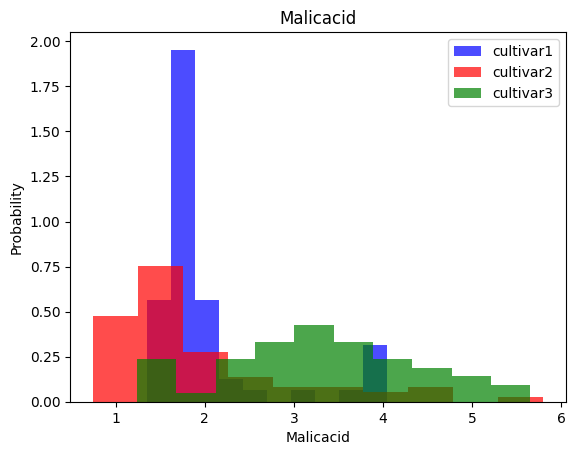

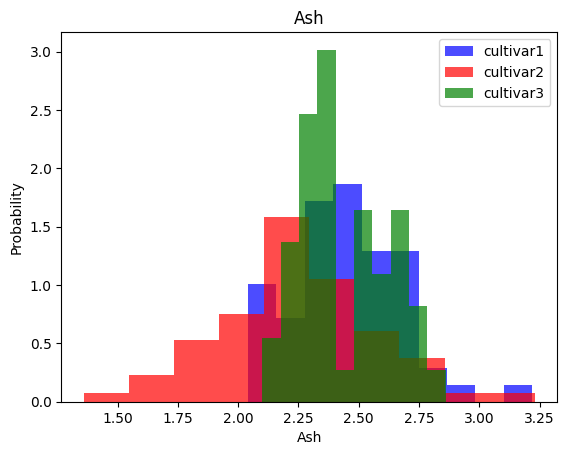

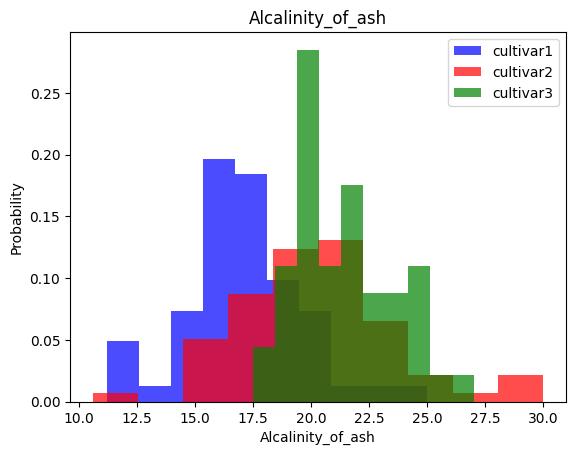

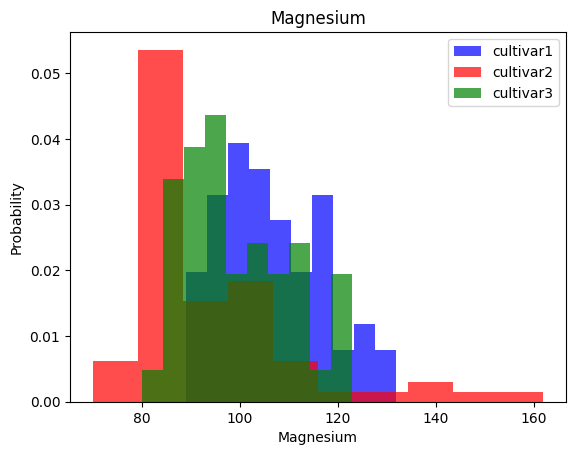

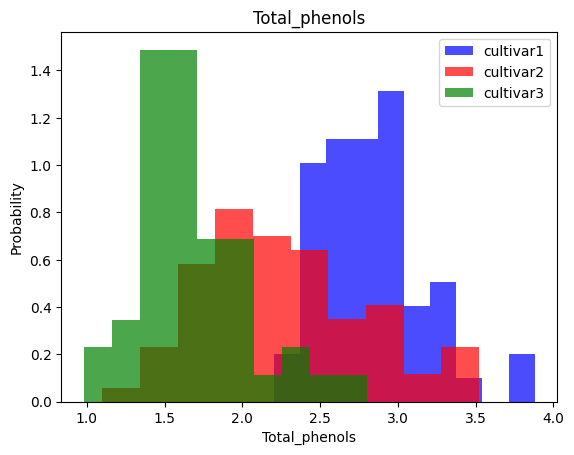

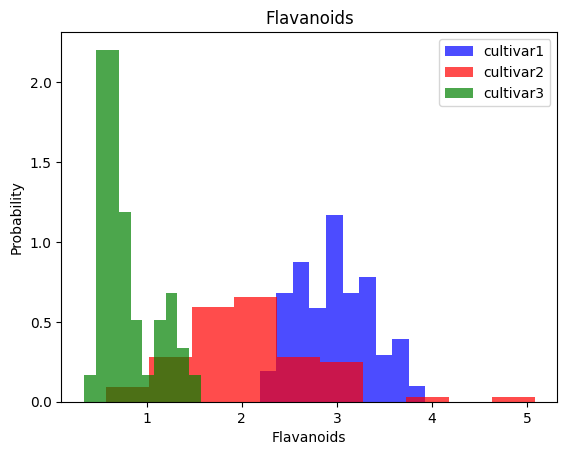

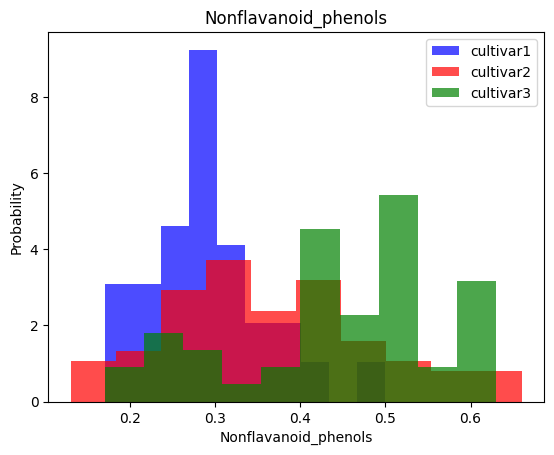

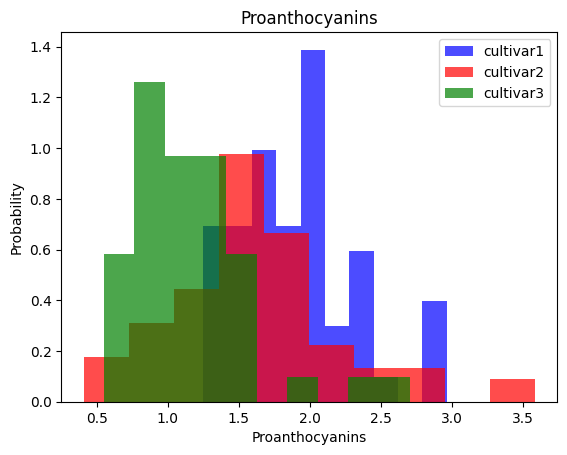

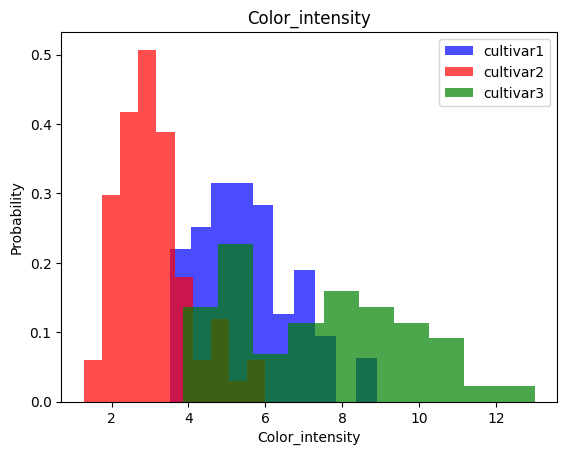

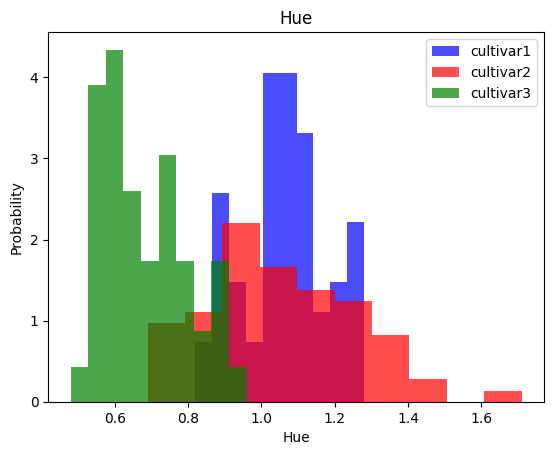

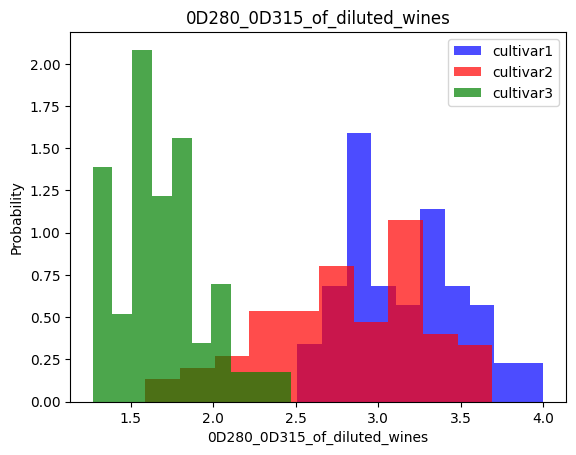

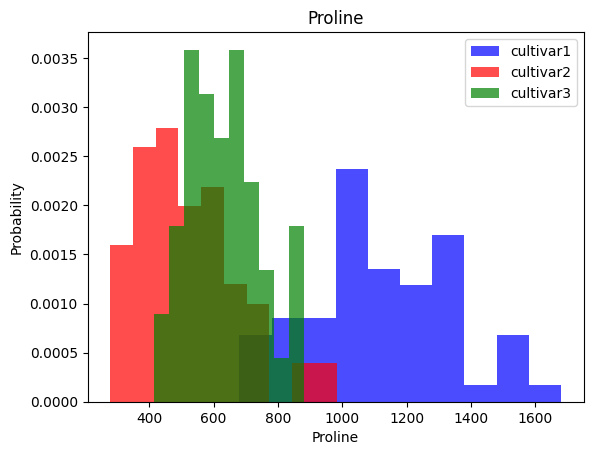

In [ ]:
#take all 10 features and plot them as a histogram
for label in col[2:]:
  #get me everything where the class is equal to 1
  plt.hist(df[df["class"] == 1][label], color = 'blue', label = 'cultivar1', alpha = 0.7, density = True)
  plt.hist(df[df["class"] == 2][label], color = 'red', label = 'cultivar2', alpha = 0.7, density = True)
  plt.hist(df[df["class"] == 3][label], color = 'green', label = 'cultivar3', alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
# Shuffle and split the data
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
# Rescale the numbers in the columns
def scale_dataset(dataframe, oversample = False):
  x = dataframe[dataframe.columns[1:]].values
  y = dataframe[dataframe.columns[0]].values

  # take x and fit the standard scalar to x and then transform all of the values
  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  # There are a lot less of cultivar3 and cultivar1 than cultivar2 so have to make it more equal by
  # sampling more from the smaller datasets
  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  # create the whole data as a 2D numpy array
  # take an array and another array and stack them together
  # however y is not 2D so we have to make it 2D
  data = np.hstack((x, np.reshape(y,(-1,1))))
  return data, x, y

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample = True)
valid, x_valid, y_valid = scale_dataset(valid, oversample = False)
test, x_test, y_test = scale_dataset(test, oversample = False)

#kNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# change number of neighbors k
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
# shows accuracy and precision (out of all of the ones we labeled as 1, how many are true 1's)
# worse for hadrons than it is for gammas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        10
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        12

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



#Naive Bayes:

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        10
           2       0.92      0.86      0.89        14
           3       1.00      0.92      0.96        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



#Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# using basic logistic regression but can change the parameters based on the validation data
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



#SVM:

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.93      1.00      0.97        14
           3       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



#Neural Networks: